# 데이터 시각화 I 실습

막대그래프, 선그래프, 히스토그램, 파이차트, 산점도, 박스플롯을 구현해봅니다.

실습에 사용하는 데이터는 https://www.kaggle.com/datasets/nikhil7280/weather-type-classification 데이터입니다.

본인이 원하는 다른 데이터가 있다면 다른 데이터를 사용하셔도 좋습니다.

데이터에서 적절한 데이터를 선정하여 각 시각화 분석에 적용합니다.

시각화를 진행할 때는 차트 뿐만 아니라 범례, 제목, 레이블, 색상, 크기 등 여러가지 요소들을 직접 개발하시면서

데이터의 특성을 잘 이해해보시면 좋을 것 같습니다.

In [2]:
! kaggle datasets download -d nikhil7280/weather-type-classification

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
License(s): other
  0% 0.00/186k [00:00<?, ?B/s]
100% 186k/186k [00:00<00:00, 20.1MB/s]


In [3]:
! unzip /content/weather-type-classification.zip

Archive:  /content/weather-type-classification.zip
  inflating: weather_classification_data.csv  


In [4]:
# 기본 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [13]:
data = pd.read_csv('/content/weather_classification_data.csv')
data

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [7]:
# 데이터 타입 확인
print("#"*10)
print("데이터 타입 확인")
print("Data Types:\n", data.dtypes)

# 범주형 및 수치형 데이터 분리하여 분석
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

print("#"*10)
print("범주형 데이터 분리하여 분석")
print("\nCategorical Columns:\n", categorical_cols)

print("#"*10)
print("수치형 데이터 분리하여 분석")
print("\nNumerical Columns:\n", numerical_cols)

##########
데이터 타입 확인
Data Types:
 Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object
##########
범주형 데이터 분리하여 분석

Categorical Columns:
 Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')
##########
수치형 데이터 분리하여 분석

Numerical Columns:
 Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')


In [8]:
# 결측치 파악
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# 중복 데이터 파악
duplicate_rows = data[data.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)

Missing Values:
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

Duplicate Rows:
Empty DataFrame
Columns: [Temperature, Humidity, Wind Speed, Precipitation (%), Cloud Cover, Atmospheric Pressure, UV Index, Season, Visibility (km), Location, Weather Type]
Index: []


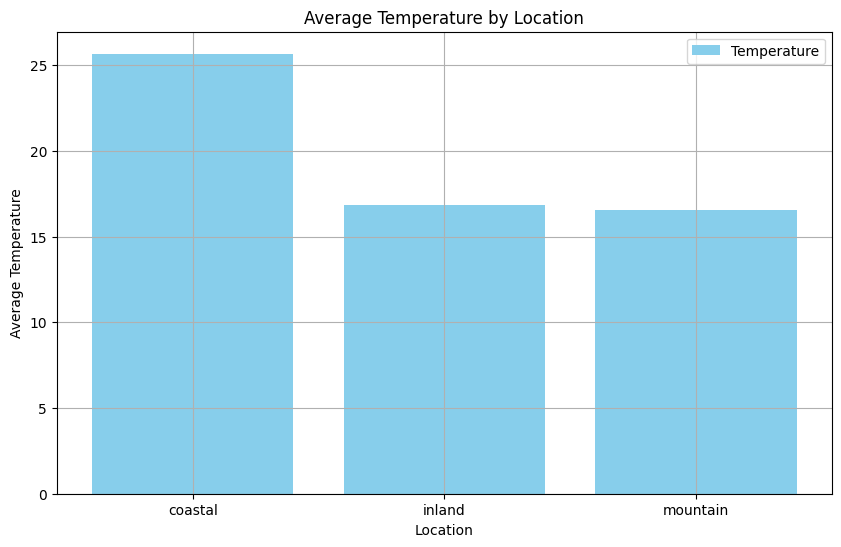

In [21]:
# 1. 막대그래프
# 각 Location에 대한 평균 Temperature 계산
location_temp = data.groupby('Location')['Temperature'].mean()

# 막대그래프 생성
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(location_temp.index, location_temp.values, color='skyblue', label='Temperature')  # 막대그래프 생성
plt.title('Average Temperature by Location')
plt.xlabel('Location')
plt.ylabel('Average Temperature')
plt.legend()  # 범례 추가
plt.grid(True)  # 그리드 추가
plt.show()  # 그래프 출력

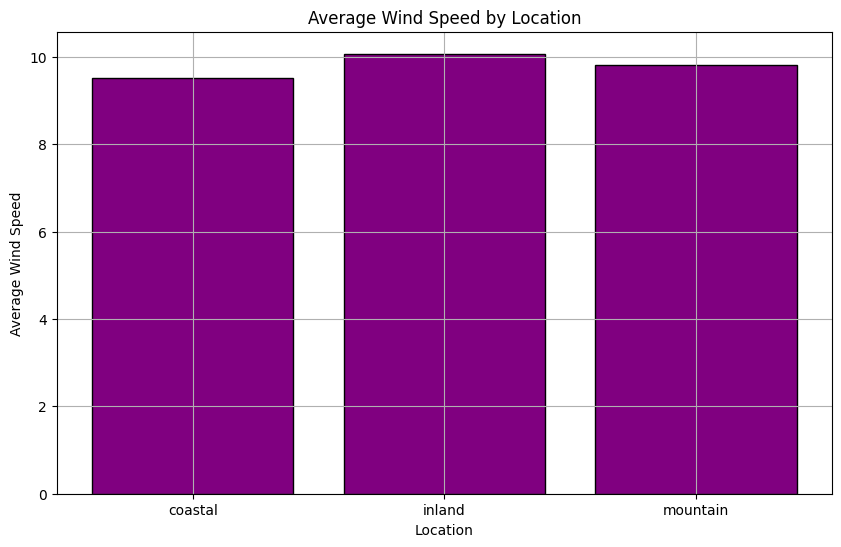

In [22]:
# 위치별 바람 속도
location_wind_speed = data.groupby('Location')['Wind Speed'].mean()

plt.figure(figsize=(10, 6))
plt.bar(location_wind_speed.index, location_wind_speed.values, color='purple', edgecolor='black')
plt.title('Average Wind Speed by Location')
plt.xlabel('Location')
plt.ylabel('Average Wind Speed')
plt.grid(True)
plt.show()

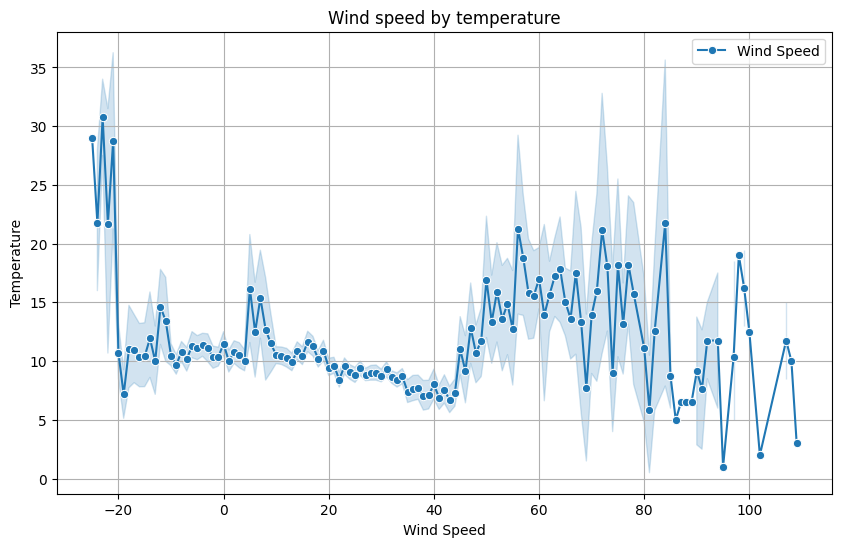

In [18]:
# 2. 선그래프
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.lineplot(x='Temperature', y='Wind Speed', data=data, marker='o', label='Wind Speed')
plt.title('Wind speed by temperature')  # 제목 추가
plt.xlabel('Wind Speed')  # x축 레이블 추가
plt.ylabel('Temperature')  # y축 레이블 추가
plt.legend()  # 범례 추가
plt.grid(True)  # 그리드 추가
plt.show()

Text(0, 0.5, 'Frequency')

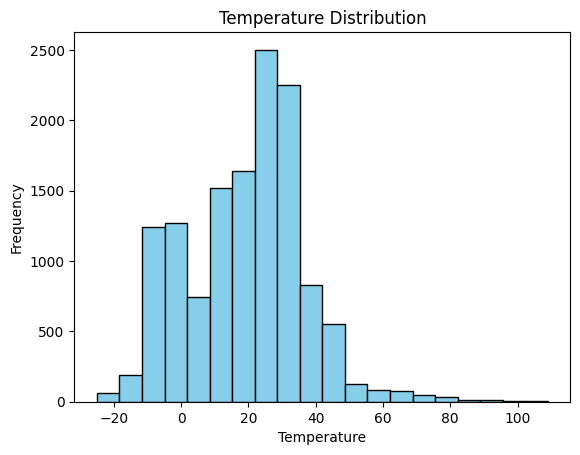

In [20]:
# 3. 히스토그램
# Temperature 히스토그램
plt.hist(data['Temperature'], bins=20, color='skyblue', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

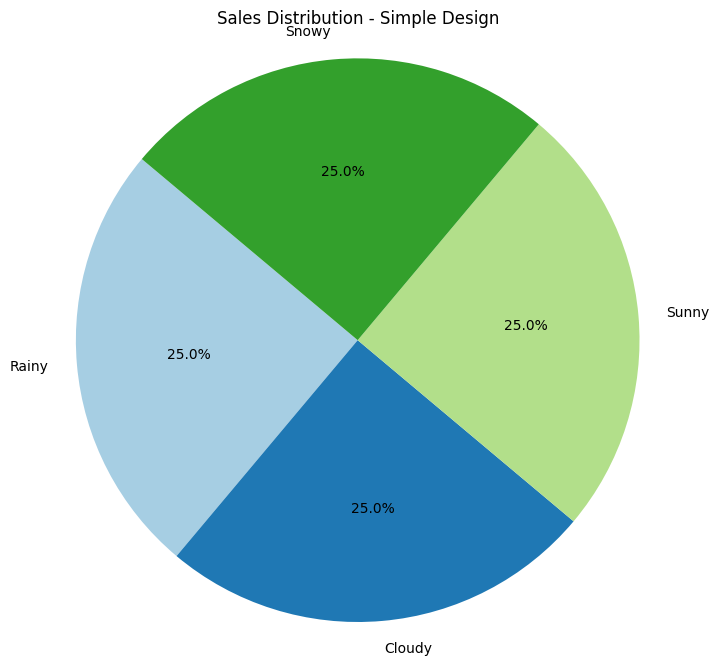

In [23]:
# 4. 파이차트
# Weather Type별 빈도 - 간결한 디자인의 파이차트

# Weather Type별 빈도 계산
weather_type_count = data['Weather Type'].value_counts()

plt.figure(figsize=(8, 8))  # 그래프 크기 설정
plt.pie(weather_type_count, labels=weather_type_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Sales Distribution - Simple Design')
plt.axis('equal')  # 파이차트를 원형으로 유지
plt.show()

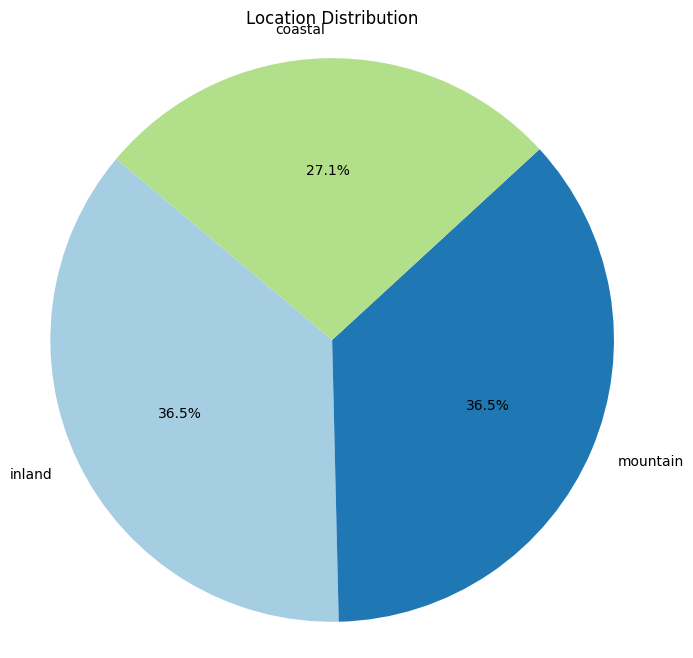

In [24]:
# Location별 빈도 계산
location_count = data['Location'].value_counts()

# 파이차트 생성
plt.figure(figsize=(8, 8))
plt.pie(location_count, labels=location_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Location Distribution')
plt.axis('equal')  # 원을 동그랗게 유지
plt.show()

In [29]:
np.random.seed(10)
data = {
    'Temperature': np.random.randn(100),
    'Humidity': np.random.randn(100)
}
df = pd.DataFrame(data)

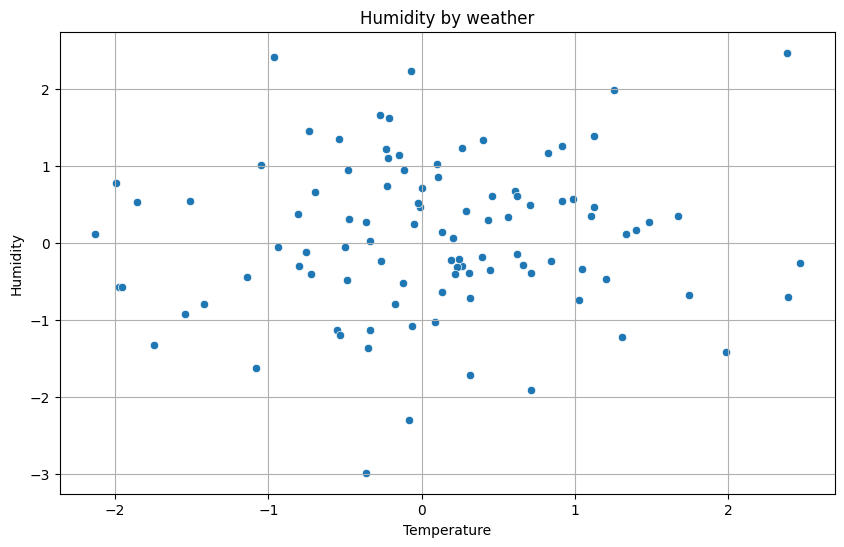

In [31]:
# 5. 산점도
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.scatterplot(x='Temperature', y='Humidity', data=data)
plt.title('Humidity by weather')  # 제목 추가
plt.xlabel('Temperature')  # x축 레이블 추가
plt.ylabel('Humidity')  # y축 레이블 추가
plt.grid(True)  # 그리드 추가
plt.show()

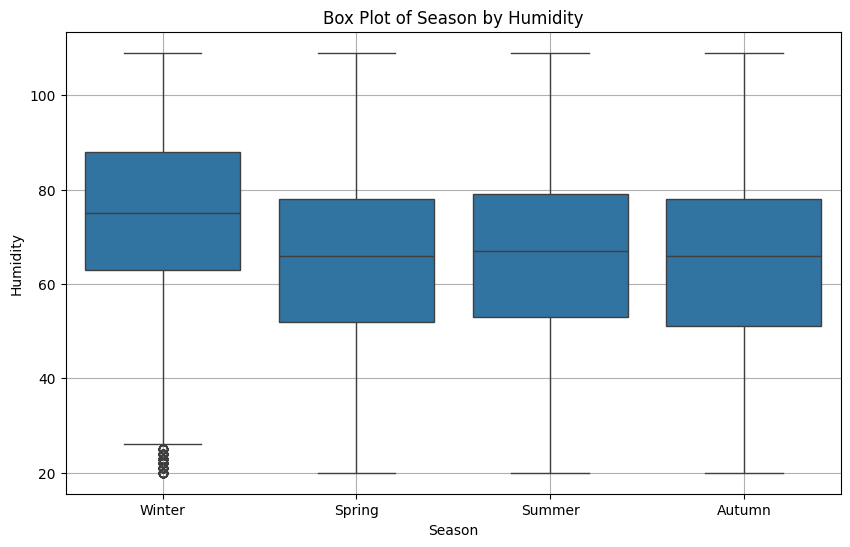

In [39]:
# 6. 박스플롯

data = pd.read_csv('/content/weather_classification_data.csv')

# 박스플롯 생성
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.boxplot(x='Season', y='Humidity', data=data)
plt.title('Box Plot of Season by Humidity')  # 제목 추가
plt.xlabel('Season')  # x축 레이블 추가
plt.ylabel('Humidity')  # y축 레이블 추가
plt.grid(True)  # 그리드 추가
plt.show()

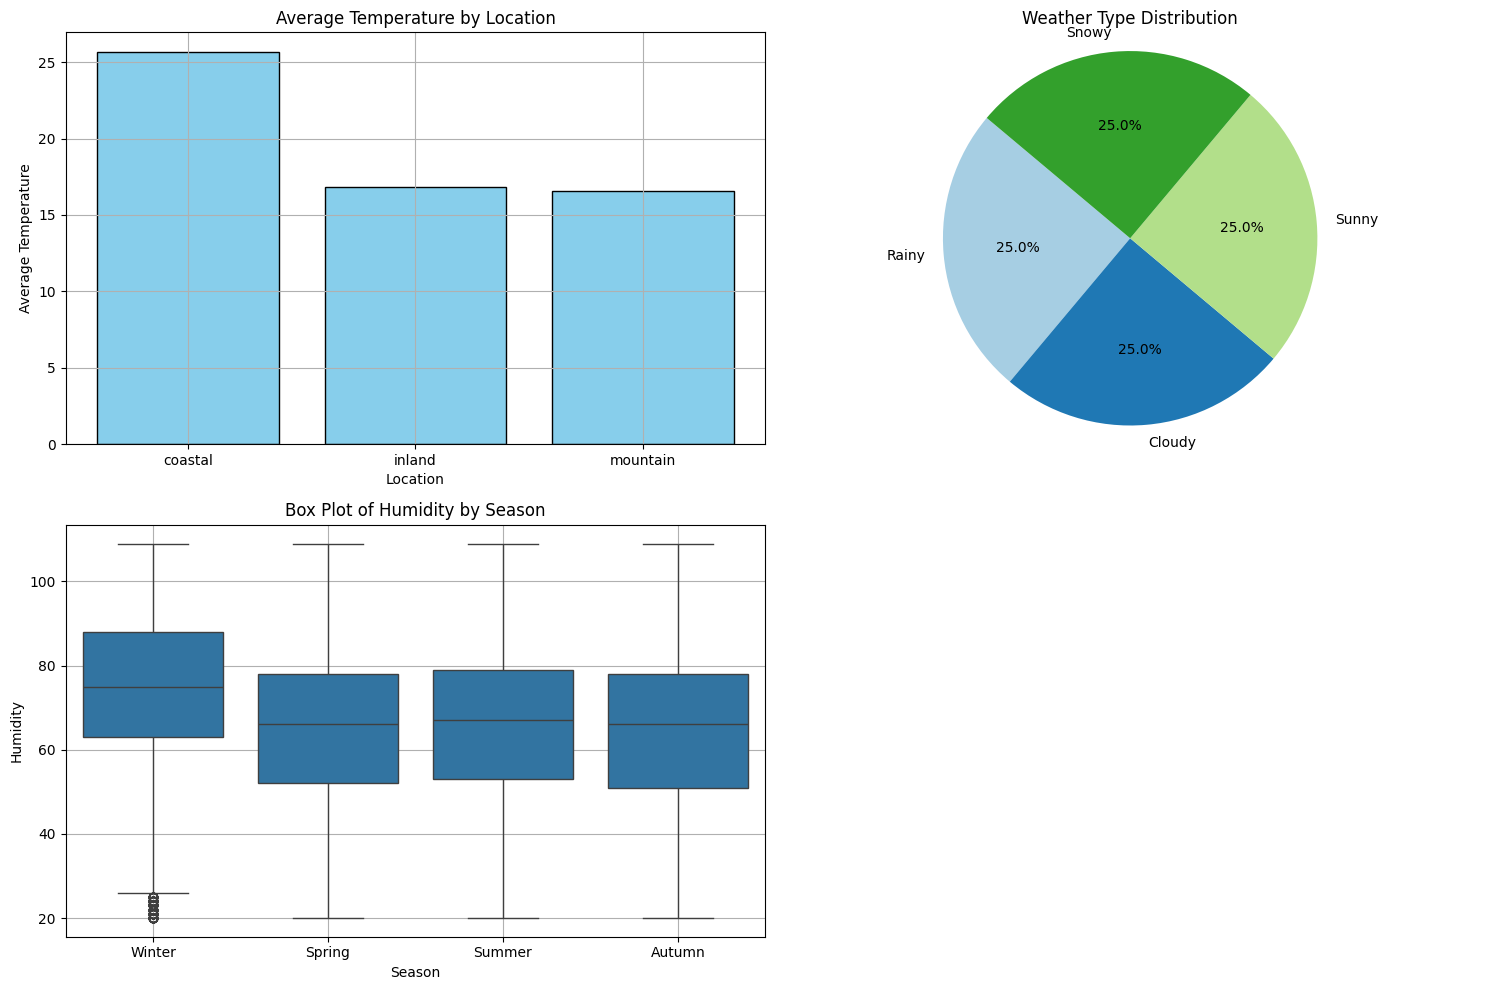

In [41]:
# 7. 여러 시각화 차트 합쳐보기

# Location별 평균 온도
location_temp = data.groupby('Location')['Temperature'].mean()

# Weather Type별 빈도
weather_type_count = data['Weather Type'].value_counts()

# 서브플롯 설정
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Location별 평균 온도 막대그래프
axs[0, 0].bar(location_temp.index, location_temp.values, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Average Temperature by Location')
axs[0, 0].set_xlabel('Location')
axs[0, 0].set_ylabel('Average Temperature')
axs[0, 0].grid(True)

# Weather Type별 빈도 파이차트
axs[0, 1].pie(weather_type_count, labels=weather_type_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axs[0, 1].set_title('Weather Type Distribution')
axs[0, 1].axis('equal')  # 원을 동그랗게 유지

# Season별 Humidity 박스플롯
sns.boxplot(x='Season', y='Humidity', data=data, ax=axs[1, 0])
axs[1, 0].set_title('Box Plot of Humidity by Season')
axs[1, 0].set_xlabel('Season')
axs[1, 0].set_ylabel('Humidity')
axs[1, 0].grid(True)

# 빈 서브플롯 (필요에 따라 다른 차트를 추가 가능)
axs[1, 1].axis('off')

# 레이아웃 조정
plt.tight_layout()
plt.show()